# Trump Press Briefing Analysis

This notebook analyzes the frequency of specific phrases in press briefings to understand key topics and messaging patterns.

## Setup

In [14]:
from src.phrase_analysis import process_directory, plot_phrase_frequency_over_time_all, plot_length_distribution, analyze_files_phrase_occurrences, get_recent_contexts_all, get_per_appearance_frequency, get_phrases, count_phrases
from src.regex_pattern_generator import generate_regex_patterns
from datetime import datetime
import pandas as pd

In [15]:
INAUGURATION_DATE = datetime(2025, 1, 20)
CONTEXT_WINDOW = 200 # words to display for context

In [16]:
PHRASES = get_phrases("KXSECPRESSMENTION-26MAR22") + ['healthcare']

SEARCH_PHRASES = generate_regex_patterns(PHRASES)

from pprint import pprint
pprint(SEARCH_PHRASES)

{'Antifa': "\\b(?:\\w+-)*(?:antifa|antifas|antifa's|antifas')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Biden': "\\b(?:\\w+-)*(?:biden|bidens|biden's|bidens')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Bolsonaro': "\\b(?:\\w+-)*(?:bolsonaro|bolsonaros|bolsonaro's|bolsonaros')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Border': "\\b(?:\\w+-)*(?:border|borders|border's|borders')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Cartel': "\\b(?:\\w+-)*(?:cartel|cartels|cartel's|cartels')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Chicago': "\\b(?:\\w+-)*(?:chicago|chicagos|chicago's|chicagos')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'China': "\\b(?:\\w+-)*(?:china|chinas|china's|chinas')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Epstein / Maxwell': "\\b(?:\\w+-)*(?:(?:epstein|epsteins|epstein's|epsteins'|maxwell|maxwells|maxwell's|maxwells'))(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Gaza / Israel': "\\b(?:\\w+-)*(?:(?:gaza|gazas|gaza's|gazas'|israel|israels|israel's|israels'))(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Health / Healthy': "\\b(?:\\w+-)*(?:(?:health|healths|health's|healt

In [22]:
# Process press briefing transcripts
df = process_directory('../data/processed-transcripts/press briefing', SEARCH_PHRASES)
df = df.sort_values('date')

# Split data by date 
df_pre = df[df['date'] < INAUGURATION_DATE]
df_post = df[df['date'] >= INAUGURATION_DATE]

# Print dataset statistics
print("Dataset Statistics:")
print(f"Pre-inauguration briefings: {len(df_pre)}")
print(f"Post-inauguration briefings: {len(df_post)}")

print("\nWord Count Statistics:")
print(f"Pre-inauguration average length: {df_pre['text_length'].mean():.0f} words")
print(f"Post-inauguration average length: {df_post['text_length'].mean():.0f} words")

print("\nDate Ranges:")
# Handle NaT values when printing date ranges
pre_min = df_pre['date'].min()
pre_max = df_pre['date'].max()
print("Pre-inauguration: ", end='')
if pd.notna(pre_min) and pd.notna(pre_max):
    print(f"{pre_min.strftime('%Y-%m-%d')} to {pre_max.strftime('%Y-%m-%d')}")
else:
    print("No valid dates")

if not df_post.empty:
    post_min = df_post['date'].min()
    post_max = df_post['date'].max() 
    print("Post-inauguration: ", end='')
    if pd.notna(post_min) and pd.notna(post_max):
        print(f"{post_min.strftime('%Y-%m-%d')} to {post_max.strftime('%Y-%m-%d')}")
    else:
        print("No valid dates")

Categories found in directory:
- press briefing
Dataset Statistics:
Pre-inauguration briefings: 0
Post-inauguration briefings: 65

Word Count Statistics:
Pre-inauguration average length: nan words
Post-inauguration average length: 2920 words

Date Ranges:
Pre-inauguration: No valid dates
Post-inauguration: 2025-01-28 to 2025-09-29


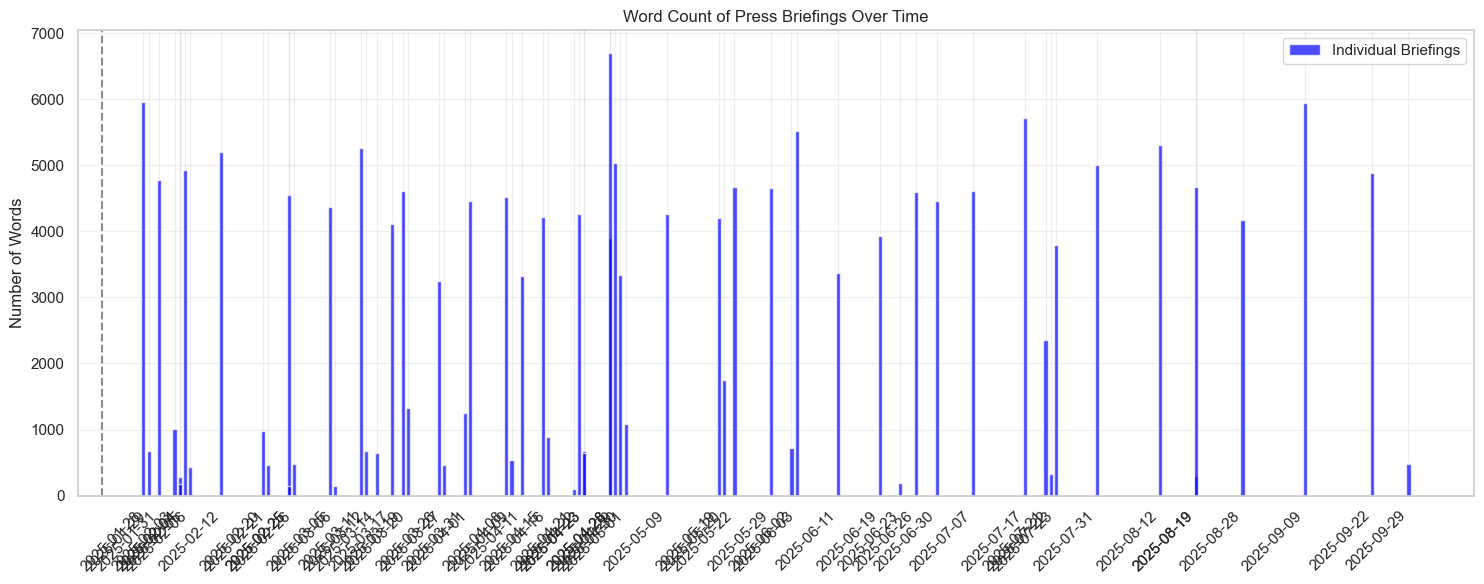


Word Count Summary:
Mean word count: 2920
Median word count: 3796
Min word count: 97
Max word count: 6706


In [23]:
from matplotlib import pyplot as plt

# Plot total word counts over time as a bar chart
plt.figure(figsize=(15, 6))

# Create bar plot
bars = plt.bar(df['date'], df['text_length'], alpha=0.7, color='blue', label='Individual Briefings')

# Format x-axis with rotated date labels
plt.xticks(df['date'], [d.strftime('%Y-%m-%d') for d in df['date']], rotation=45, ha='right')

plt.title('Word Count of Press Briefings Over Time')
plt.xlabel('') # Remove x-axis label since dates are shown
plt.ylabel('Number of Words')
plt.legend()
plt.grid(True, alpha=0.3)

# Add vertical line for inauguration
plt.axvline(x=INAUGURATION_DATE, color='k', linestyle='--', alpha=0.5, label='Inauguration')

# Set y-axis to start at 0
plt.ylim(bottom=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nWord Count Summary:")
print(f"Mean word count: {df['text_length'].mean():.0f}")
print(f"Median word count: {df['text_length'].median():.0f}")
print(f"Min word count: {df['text_length'].min():.0f}")
print(f"Max word count: {df['text_length'].max():.0f}")


In [19]:
# Filter out briefings with less than 2000 words
print(f"Original dataset size: {len(df)} briefings")
print(f"Briefings with <2000 words: {len(df[df['text_length'] < 2000])}")

# Filter the dataset
df = df[df['text_length'] >= 2000].copy()

print(f"Filtered dataset size: {len(df)} briefings")
print(f"Removed {len(df[df['text_length'] < 2000])} briefings with <2000 words")

# Reset index after filtering
df = df.reset_index(drop=True)


Original dataset size: 65 briefings
Briefings with <2000 words: 27
Filtered dataset size: 38 briefings
Removed 0 briefings with <2000 words


## Phrase Frequency Analysis


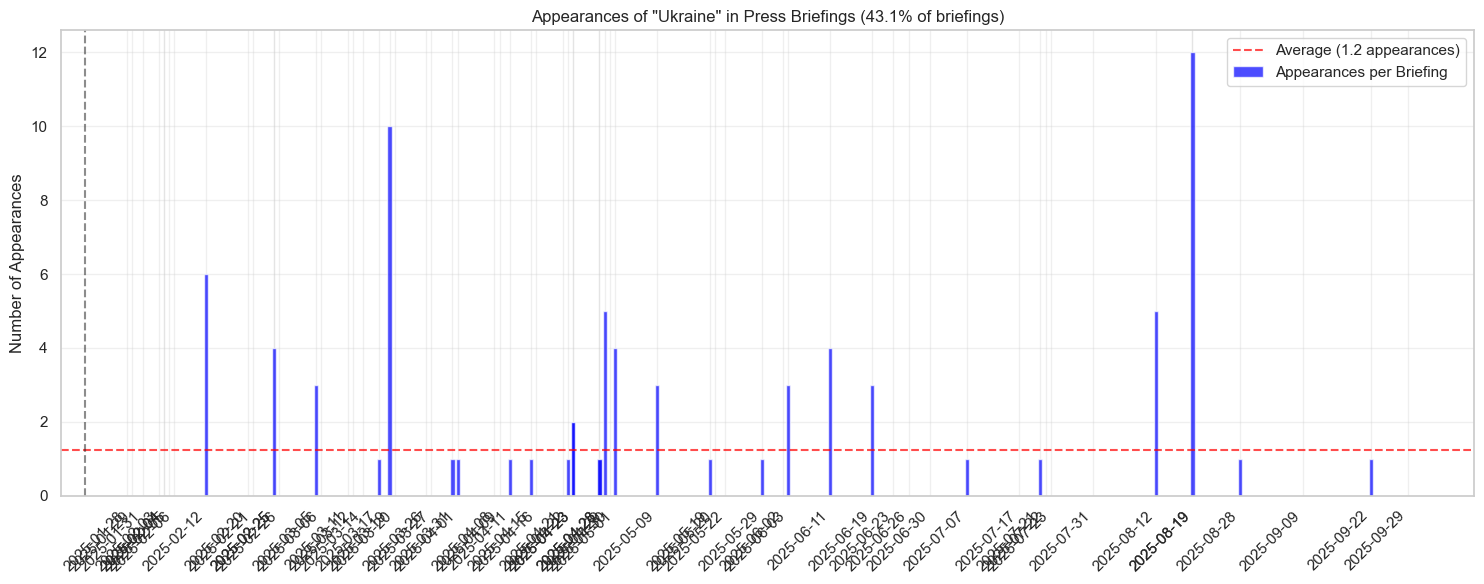


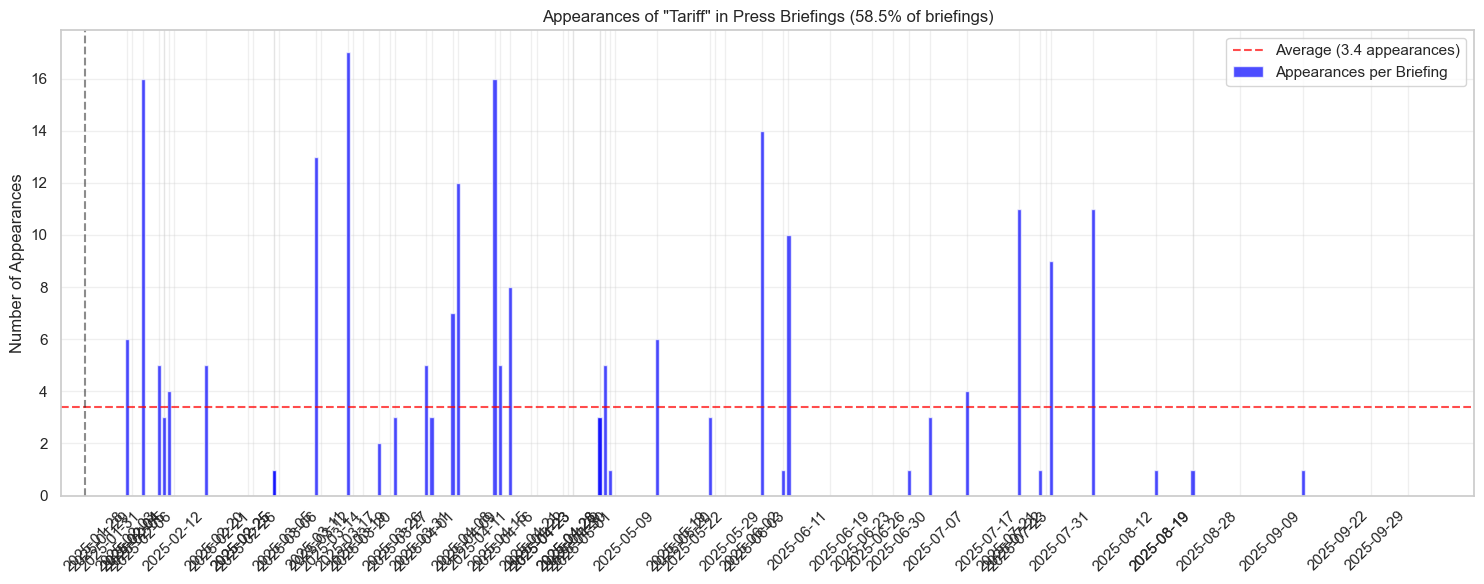


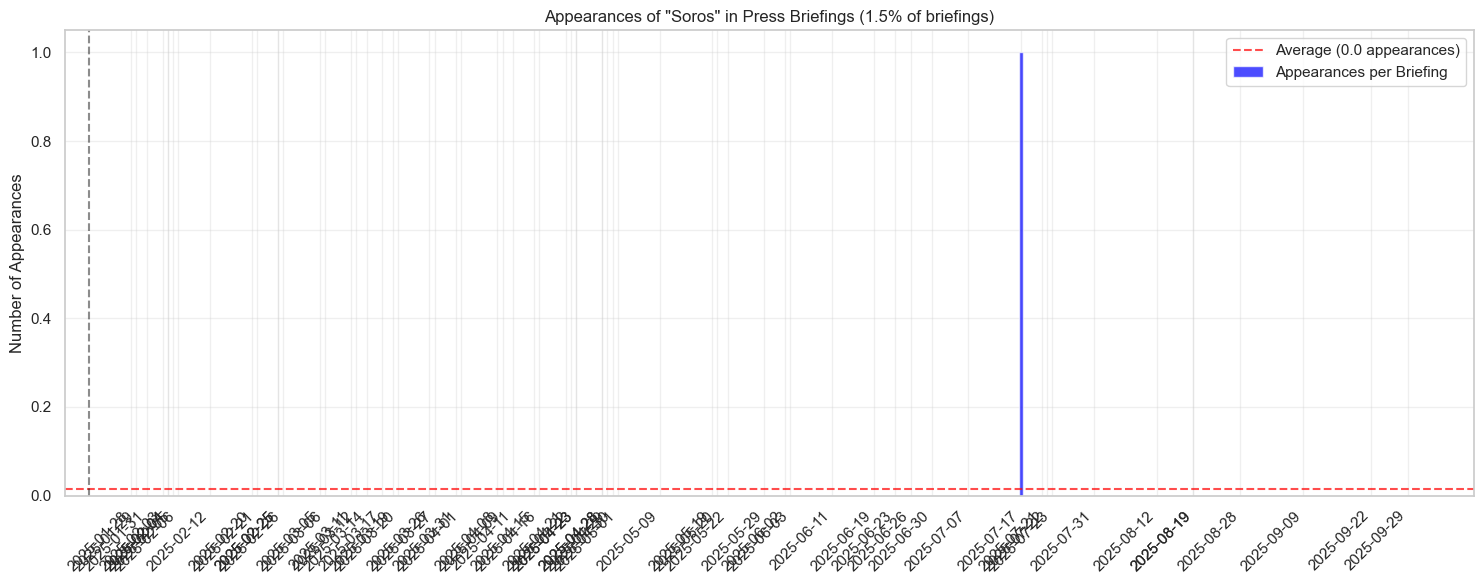


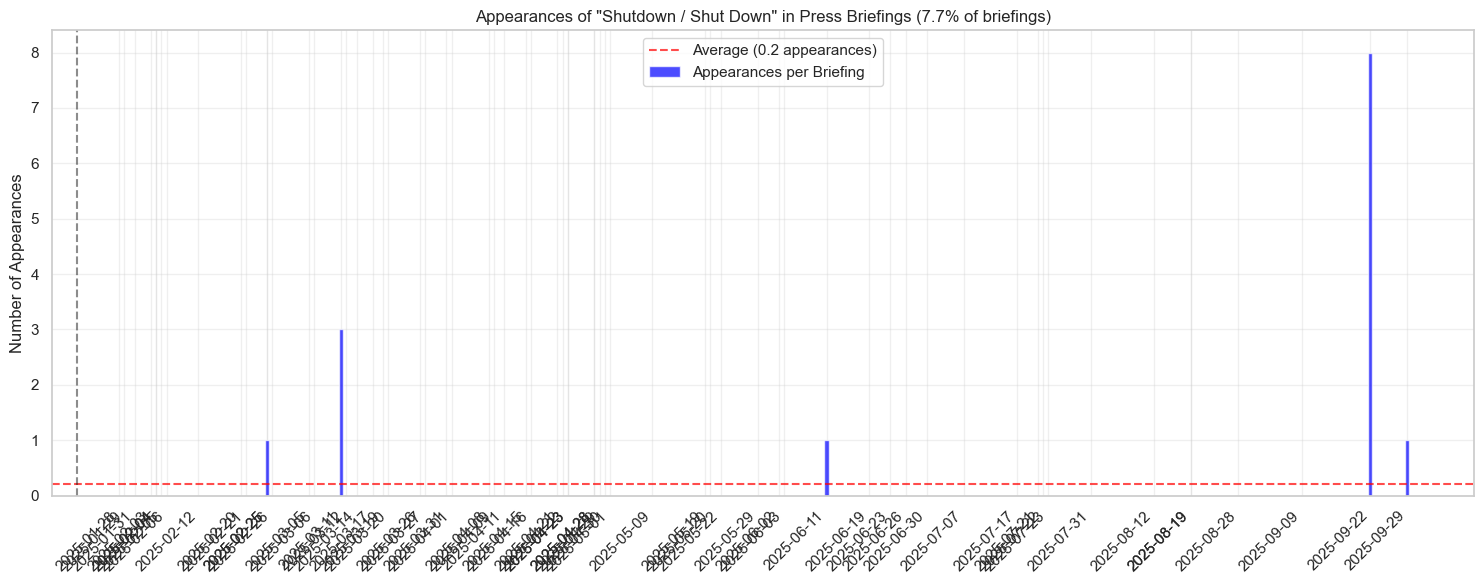


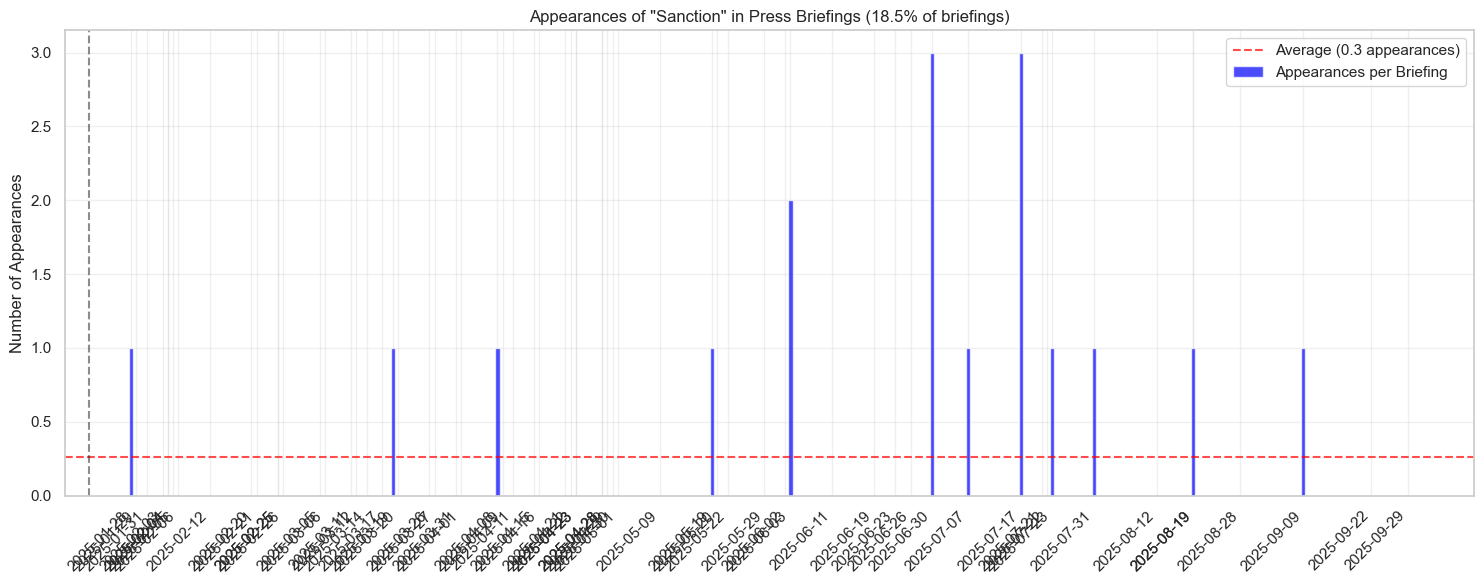


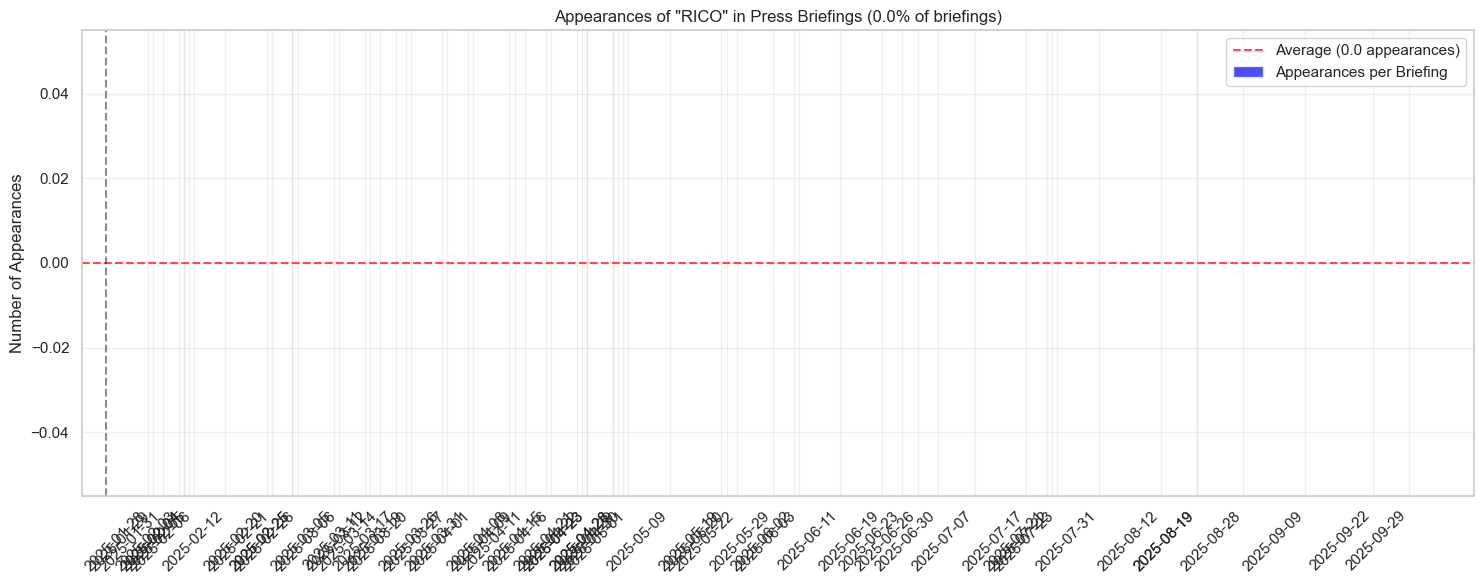


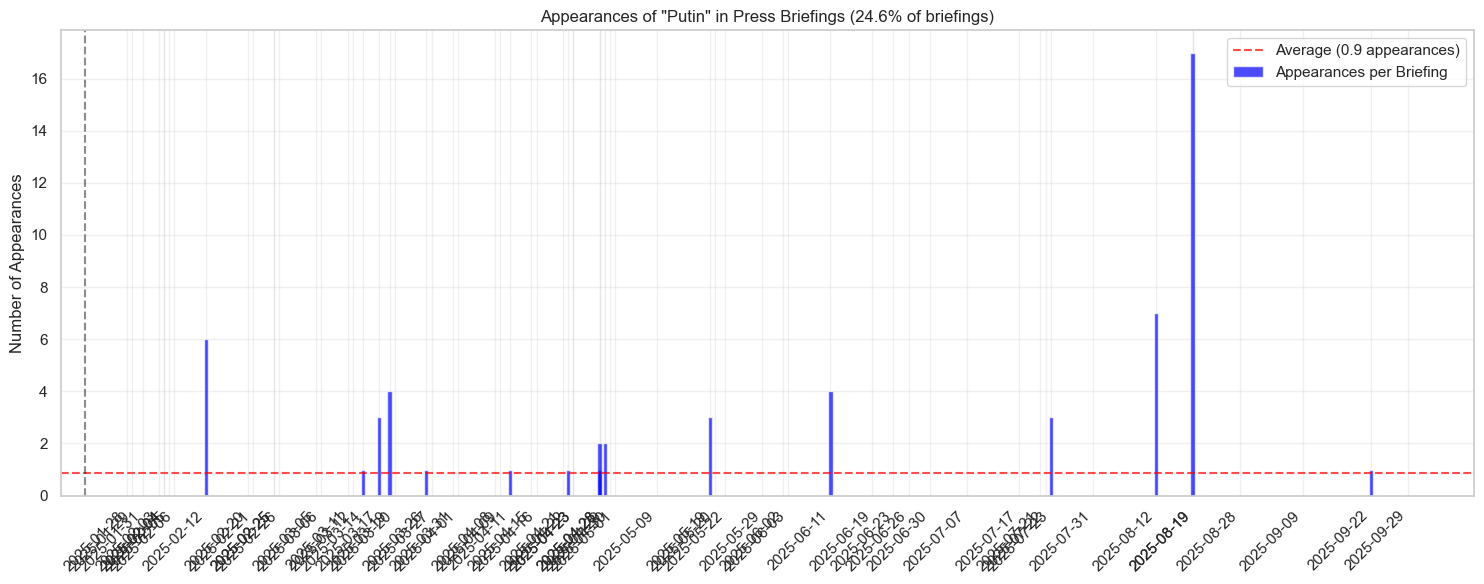


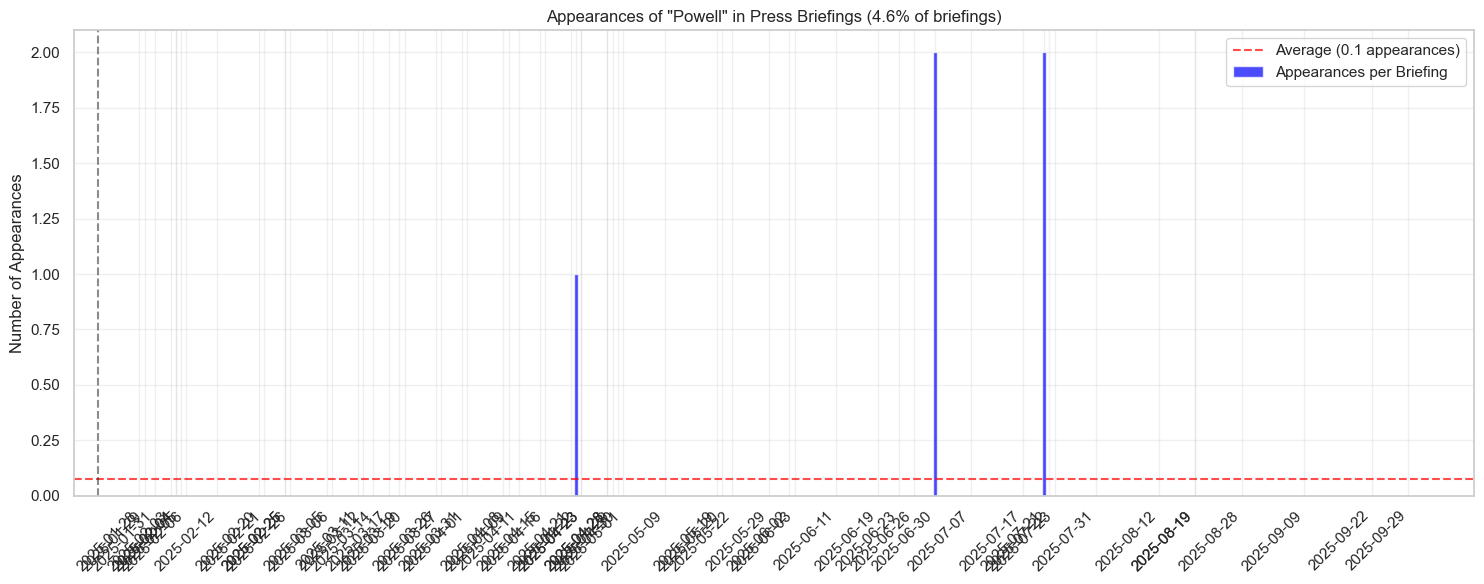


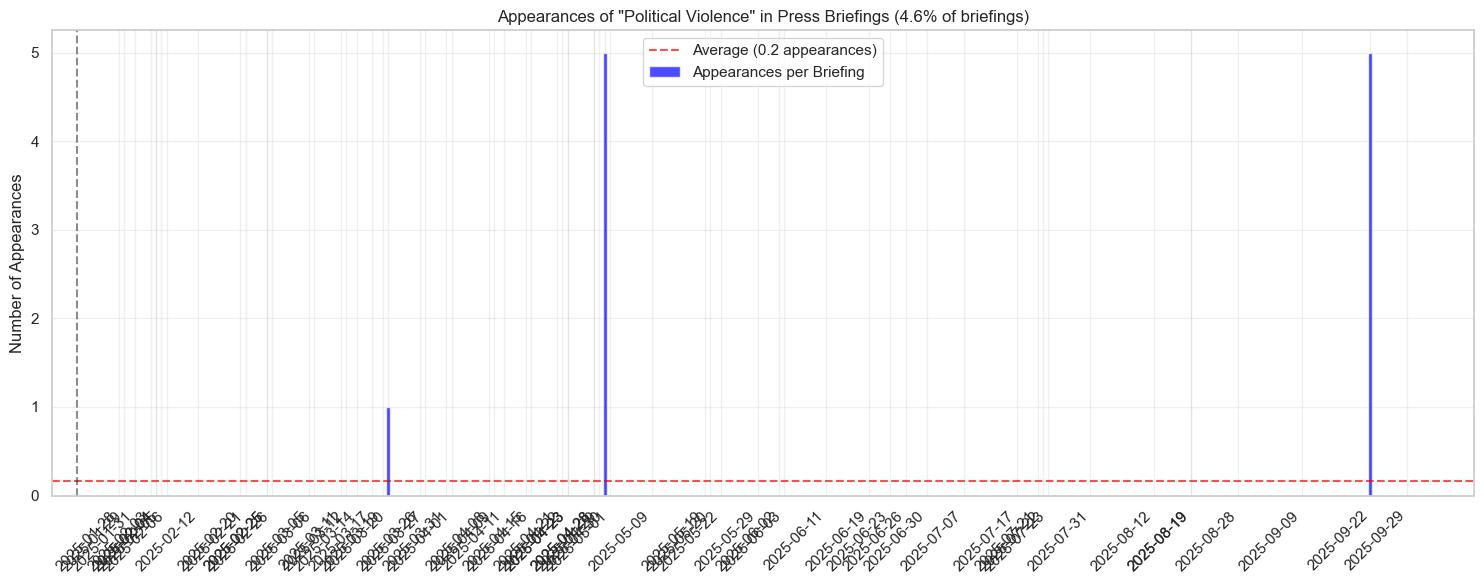


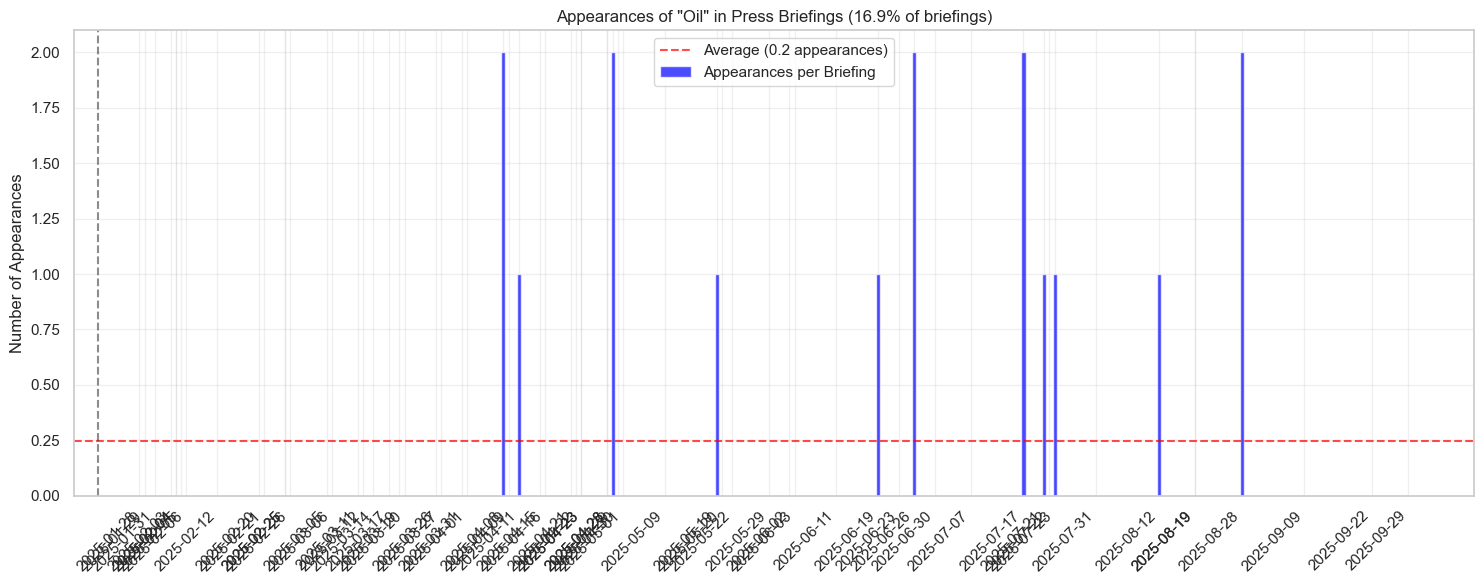


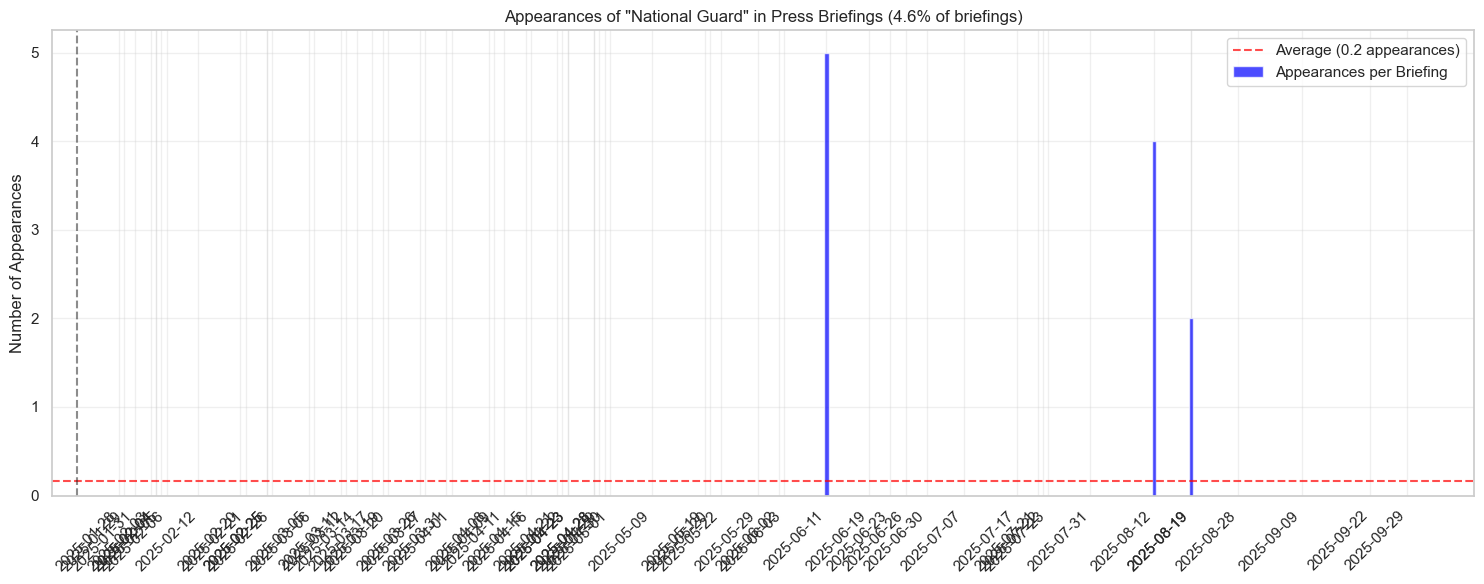


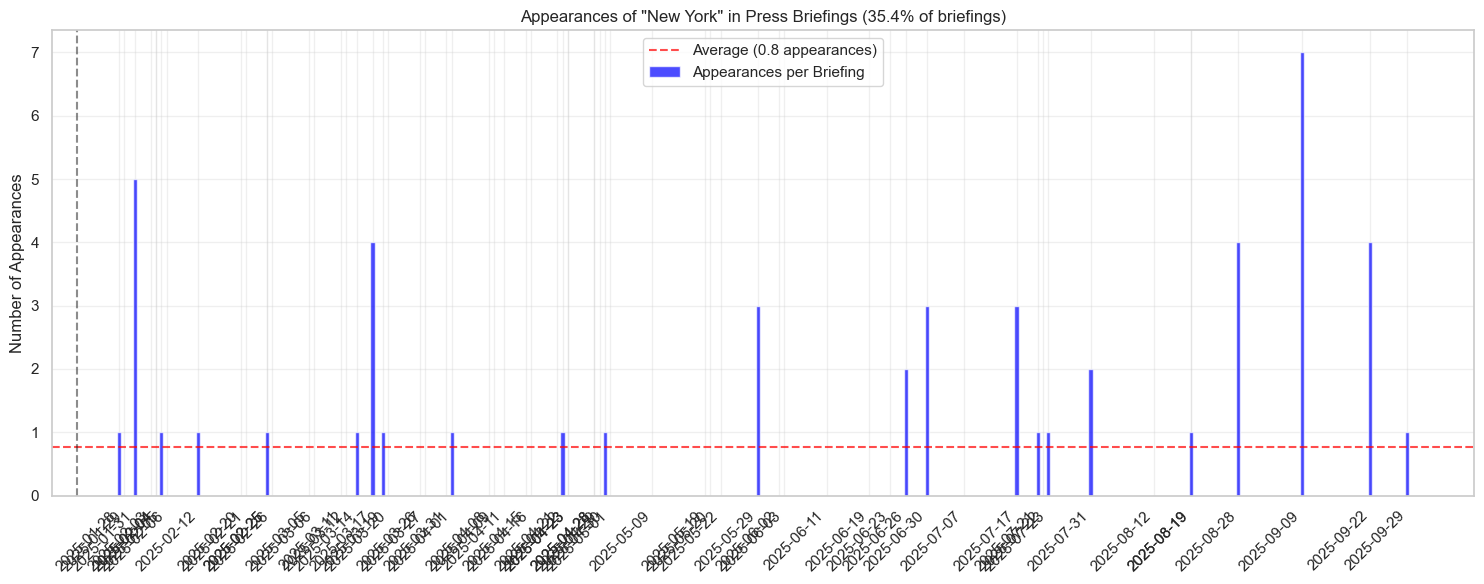


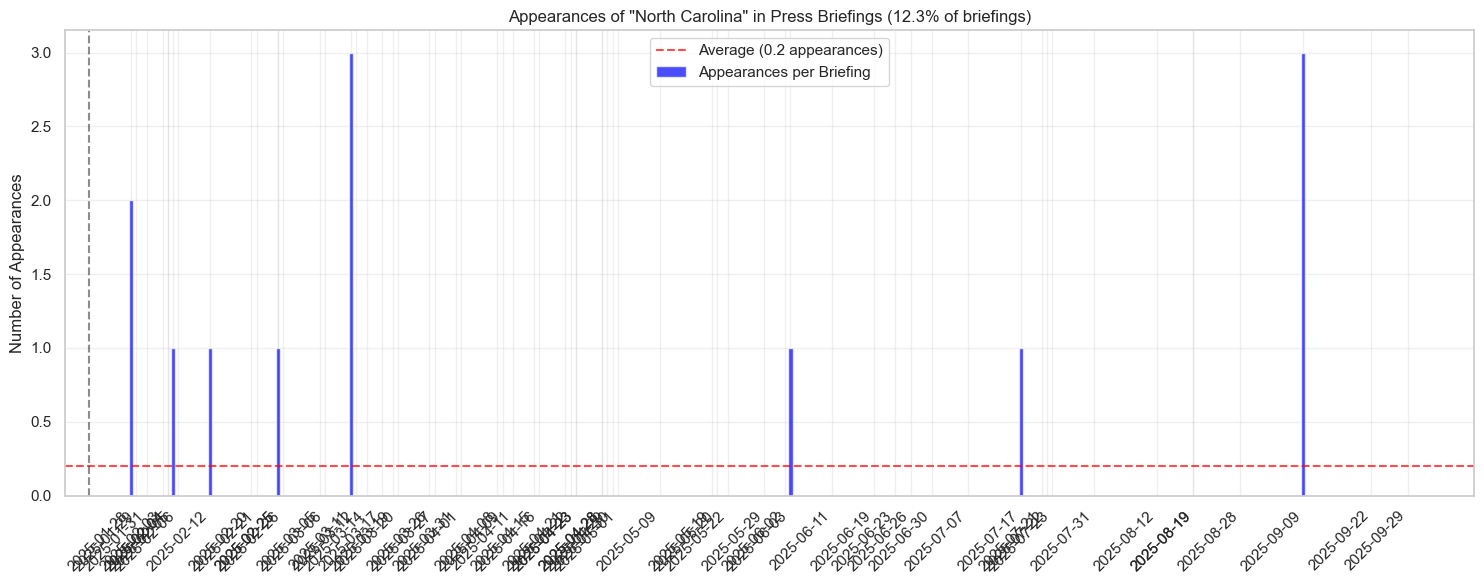


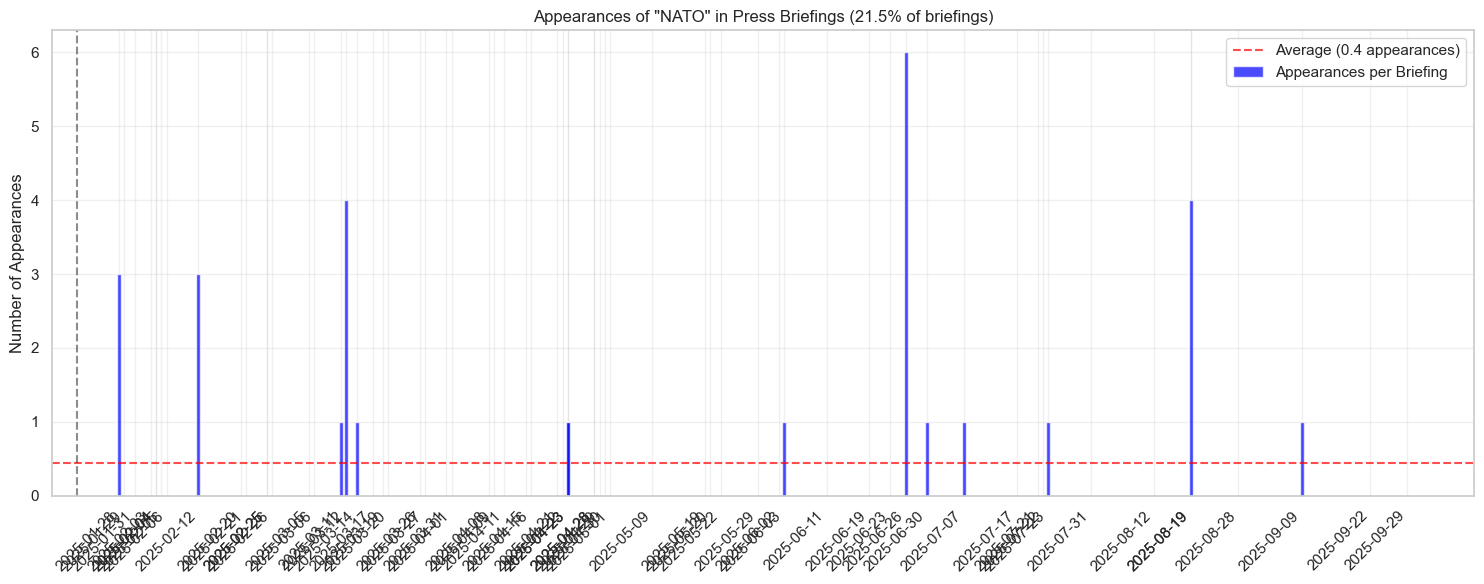


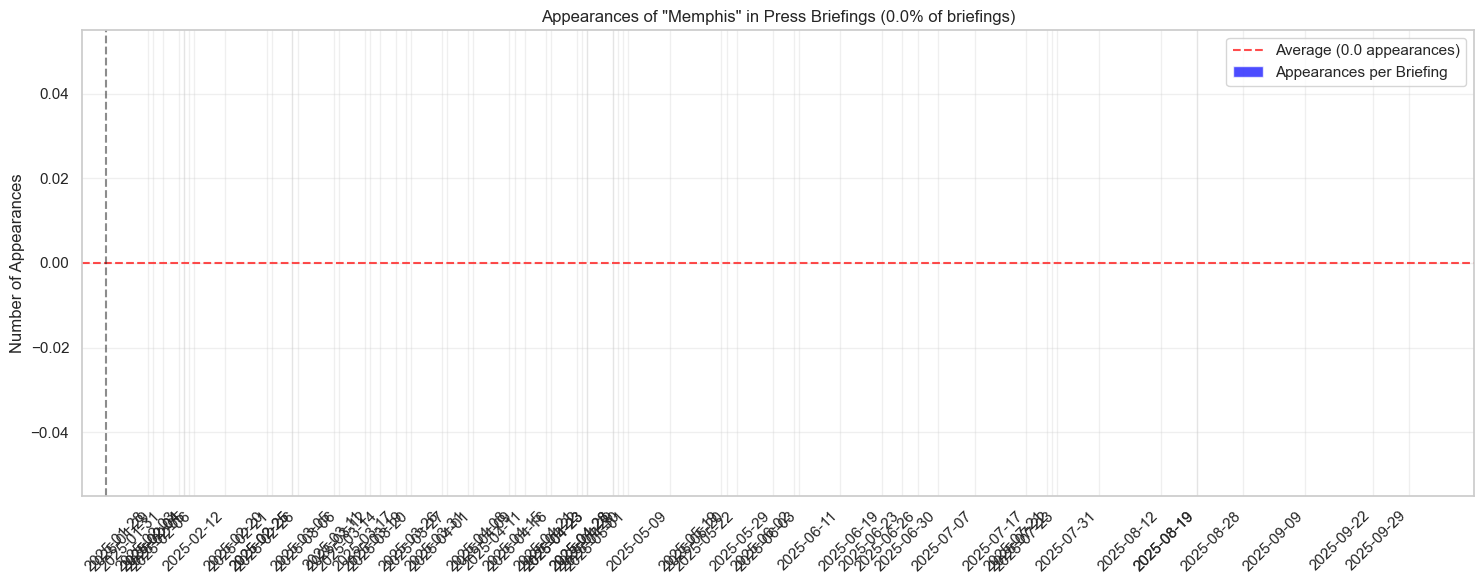


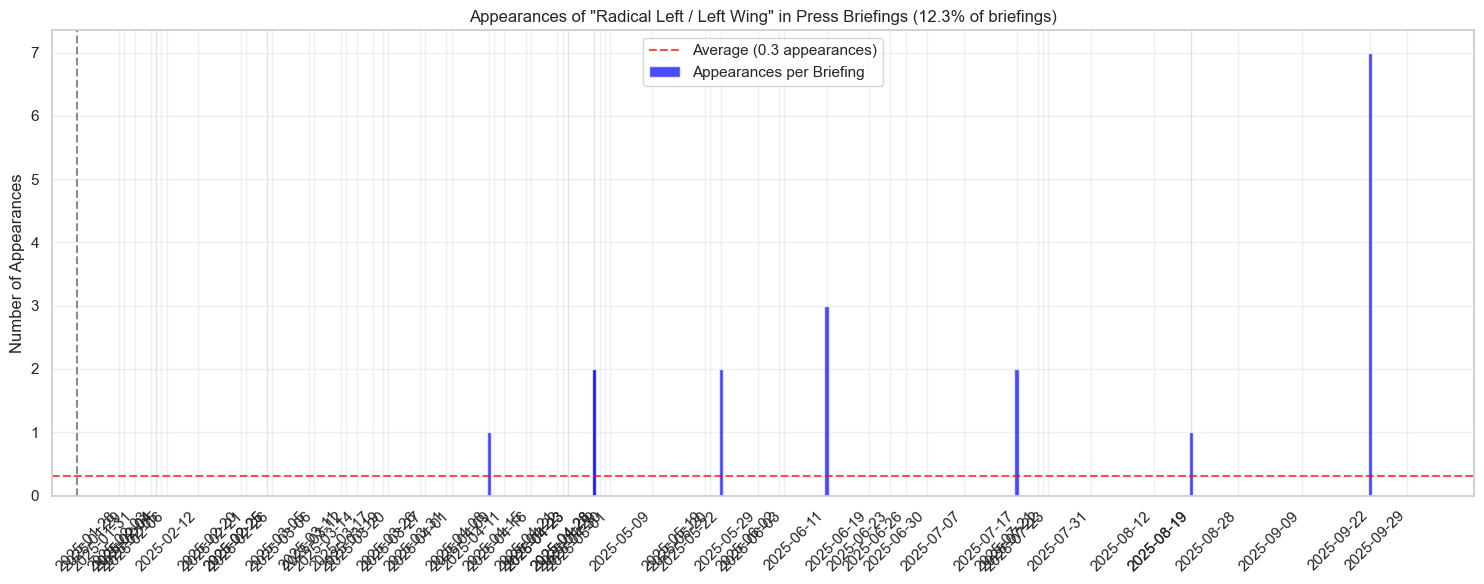


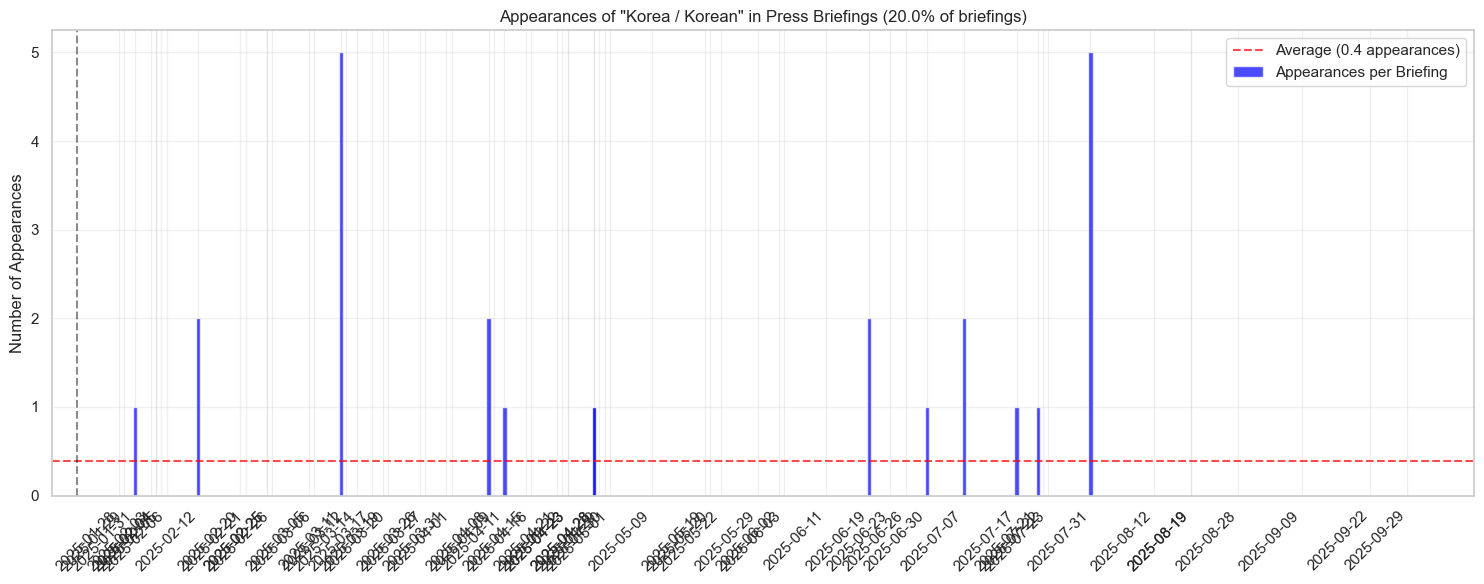


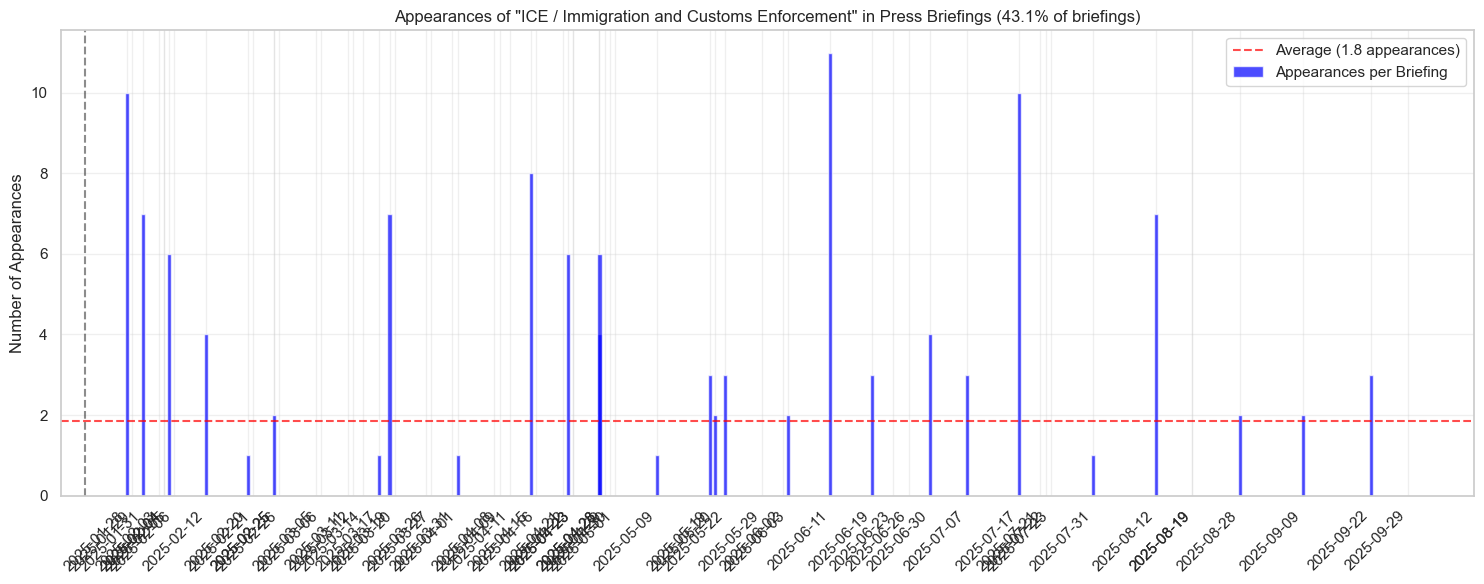


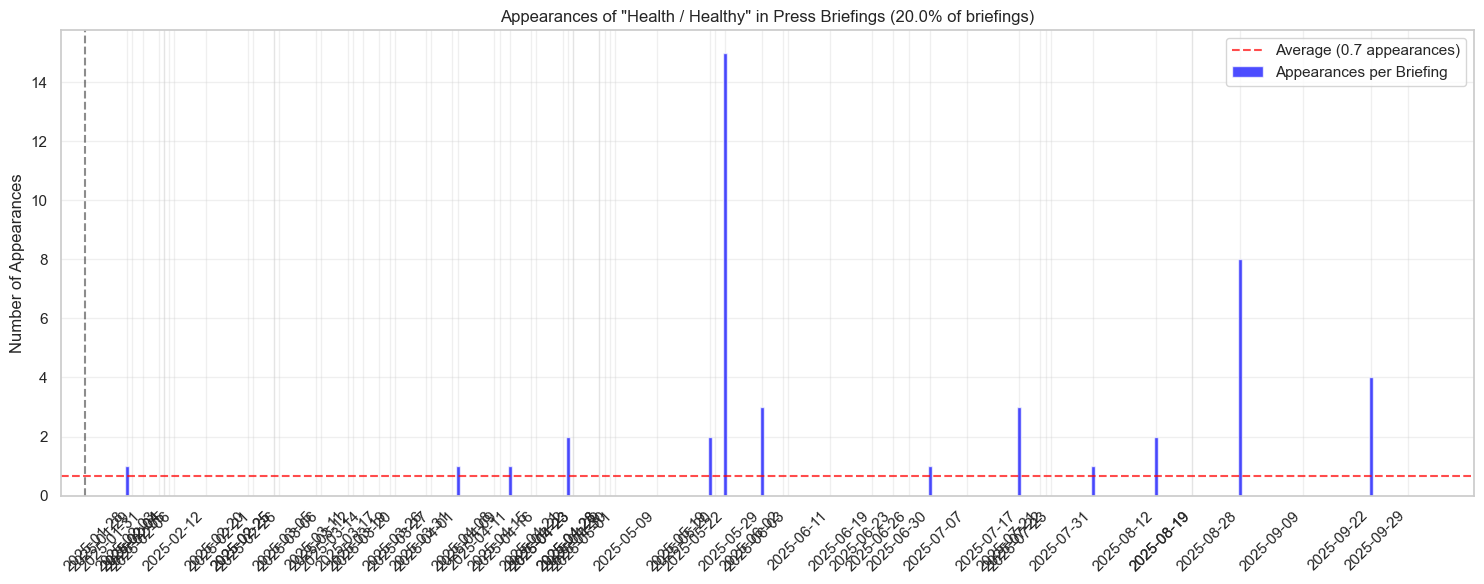


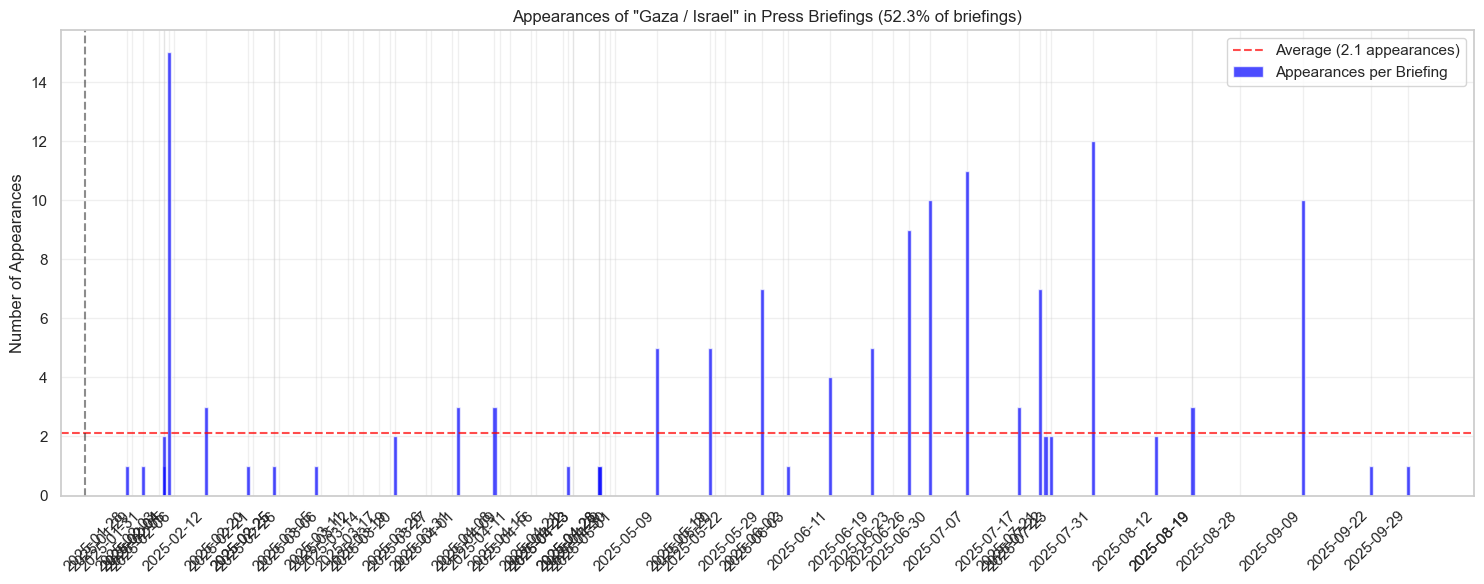


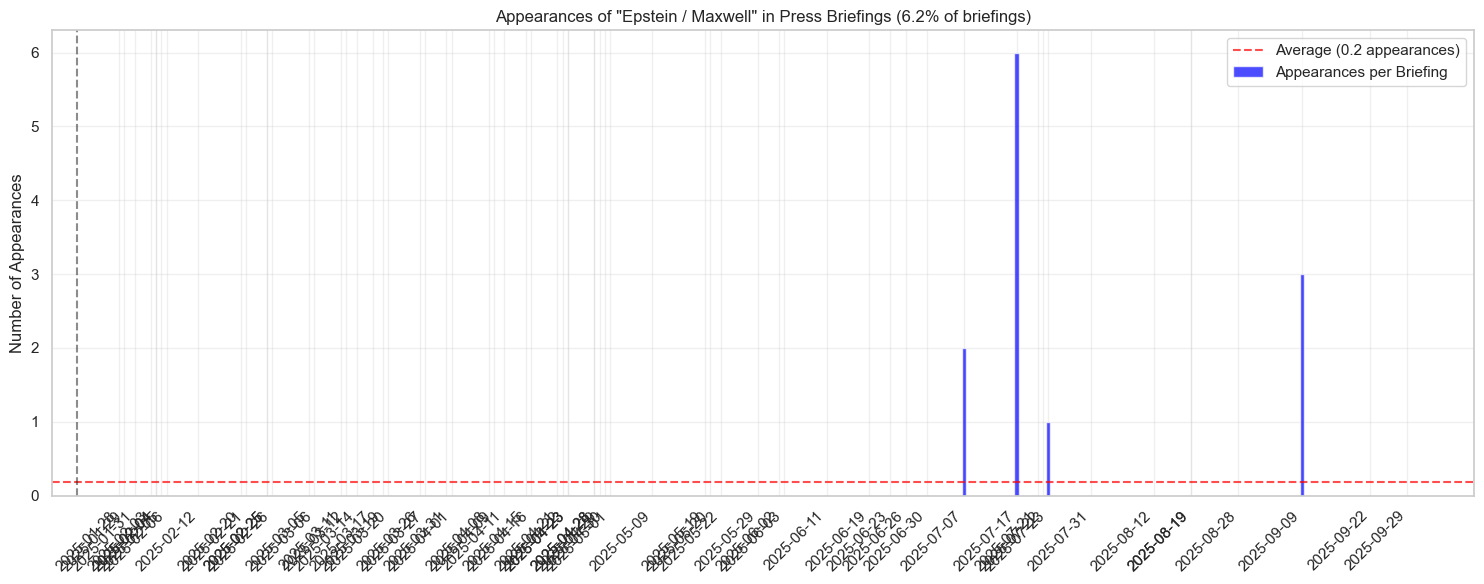


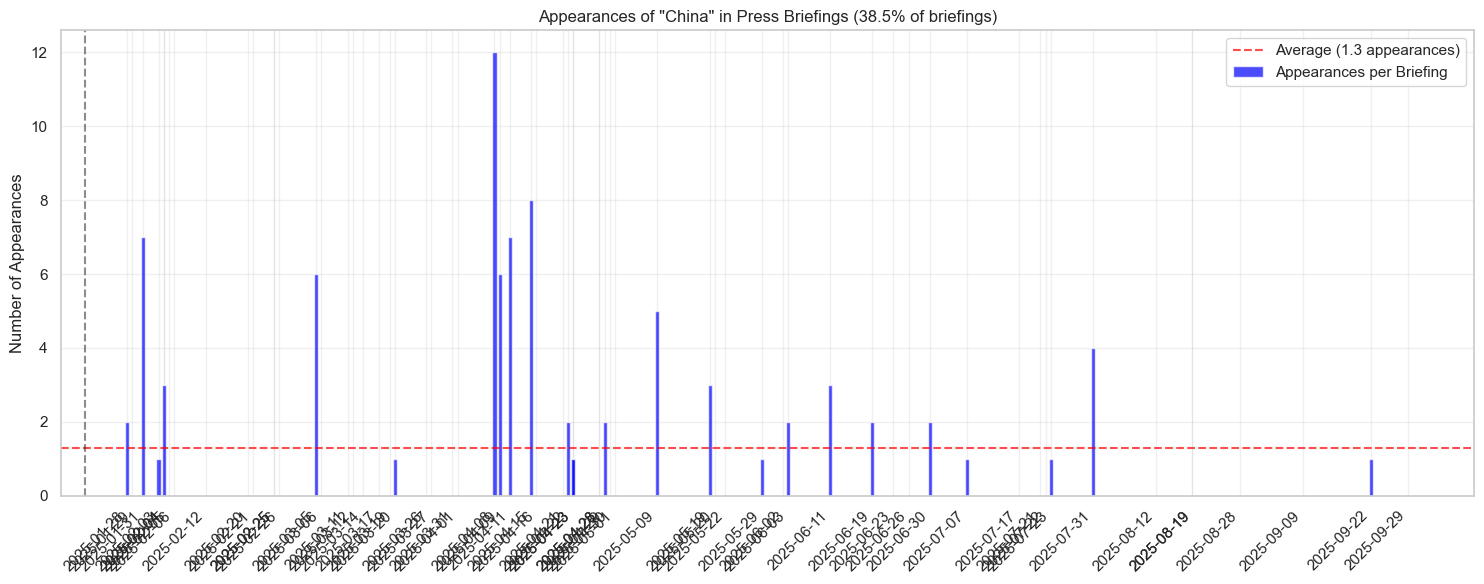


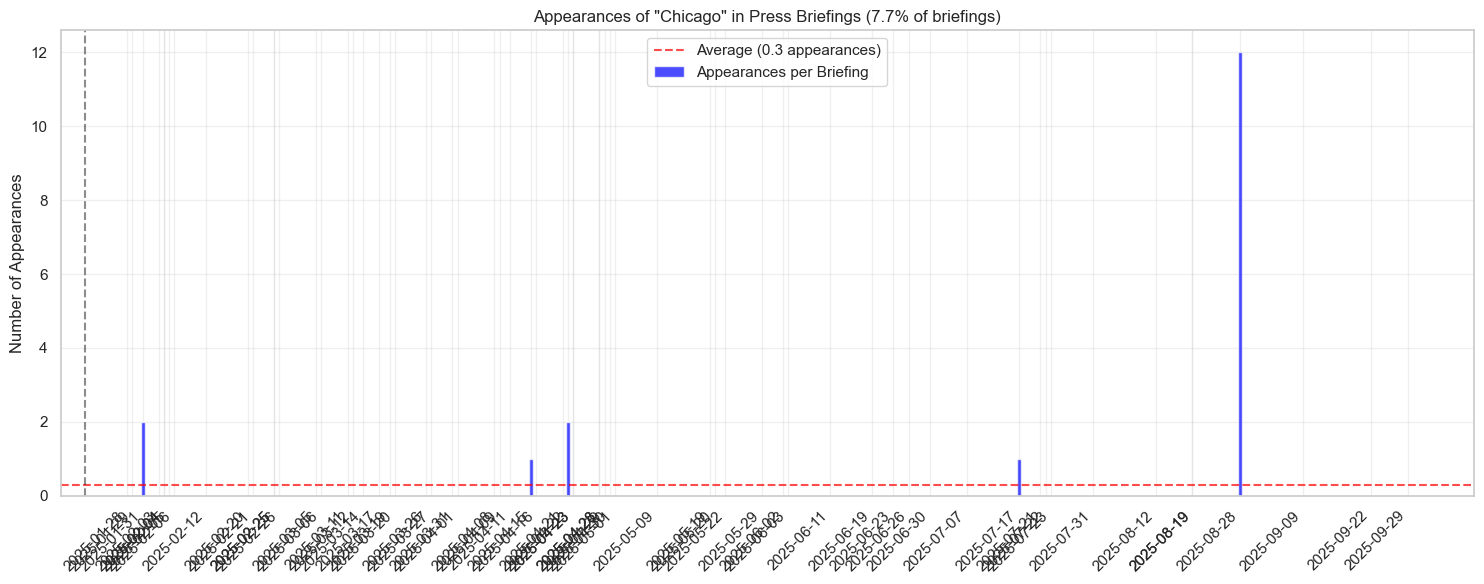


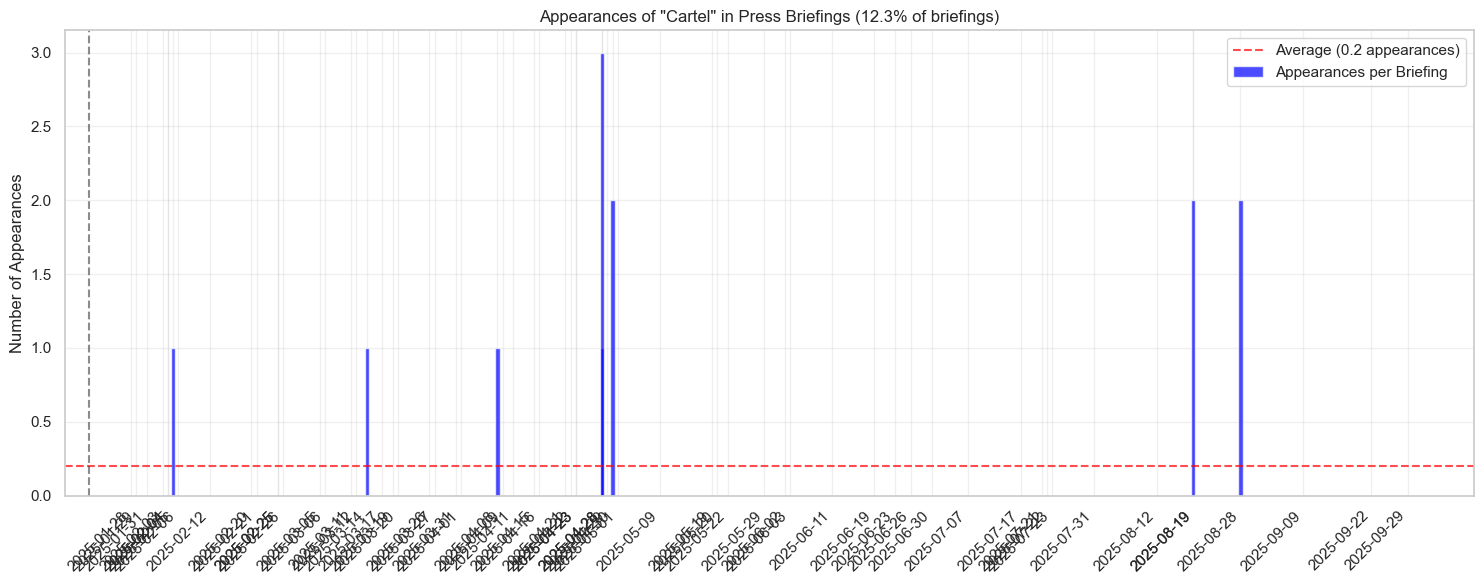


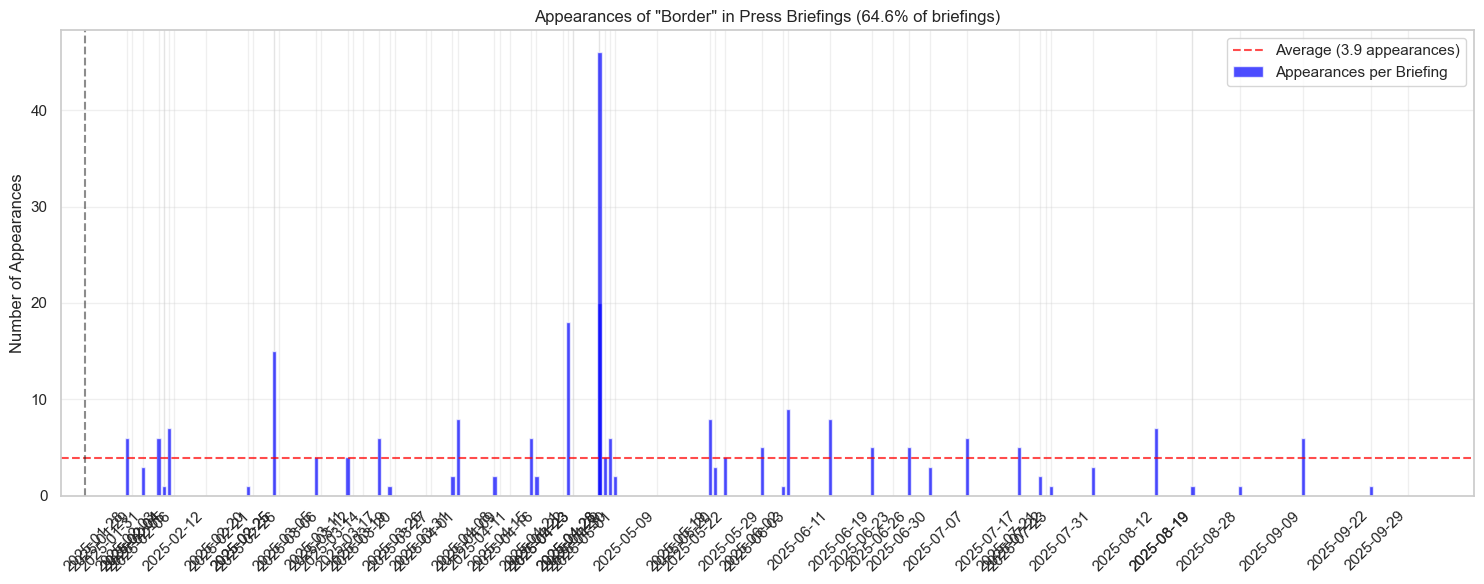


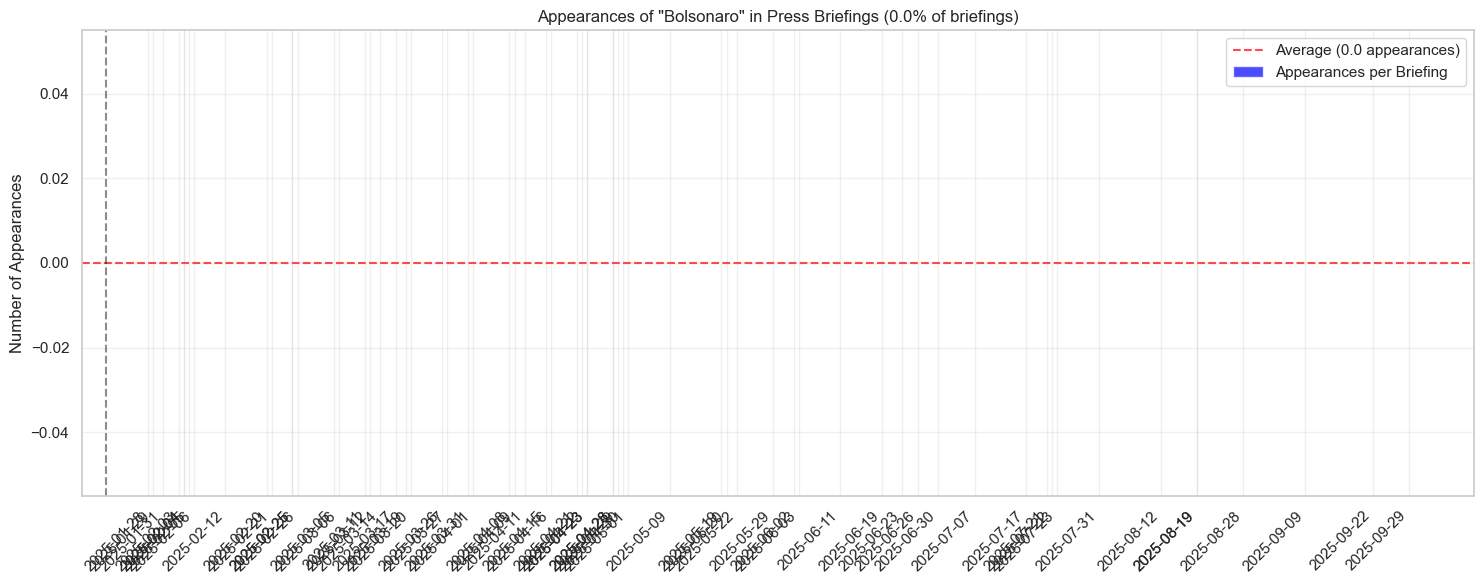


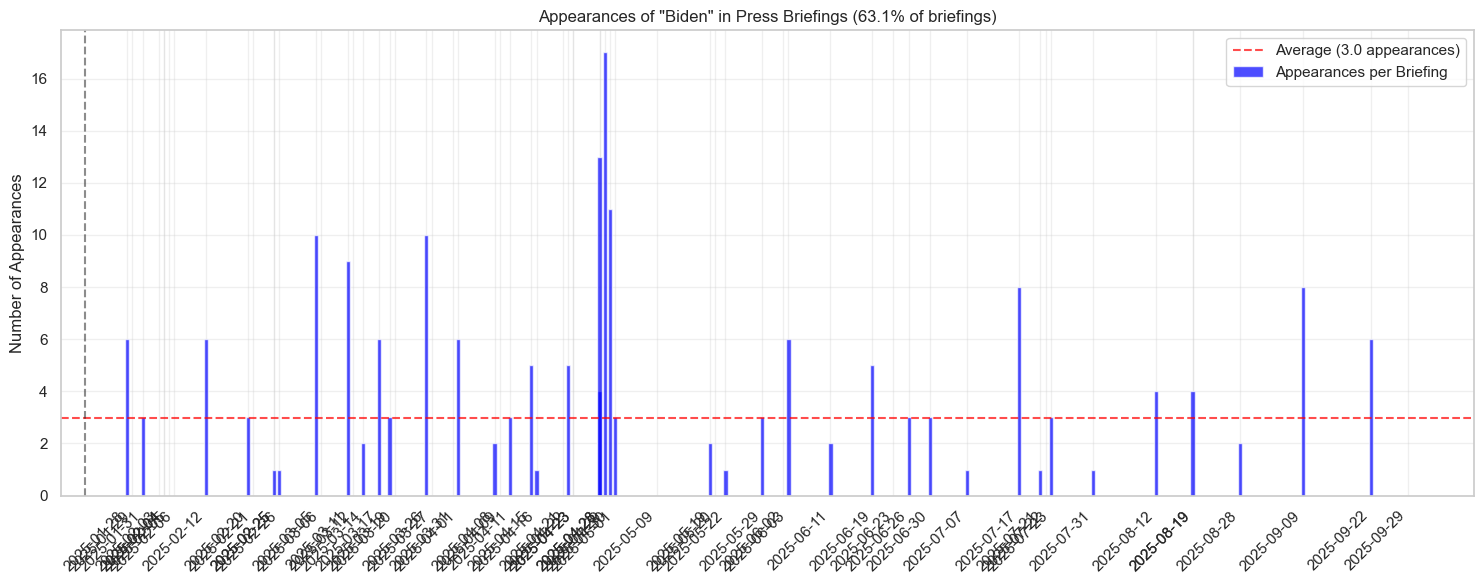


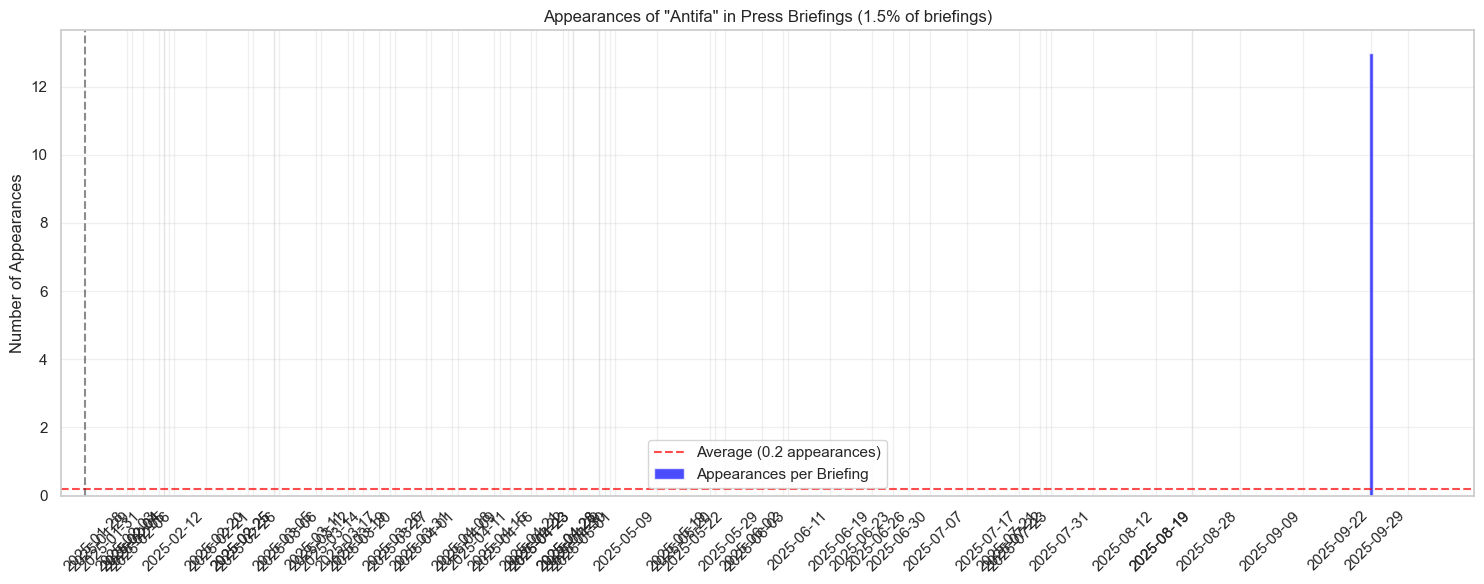


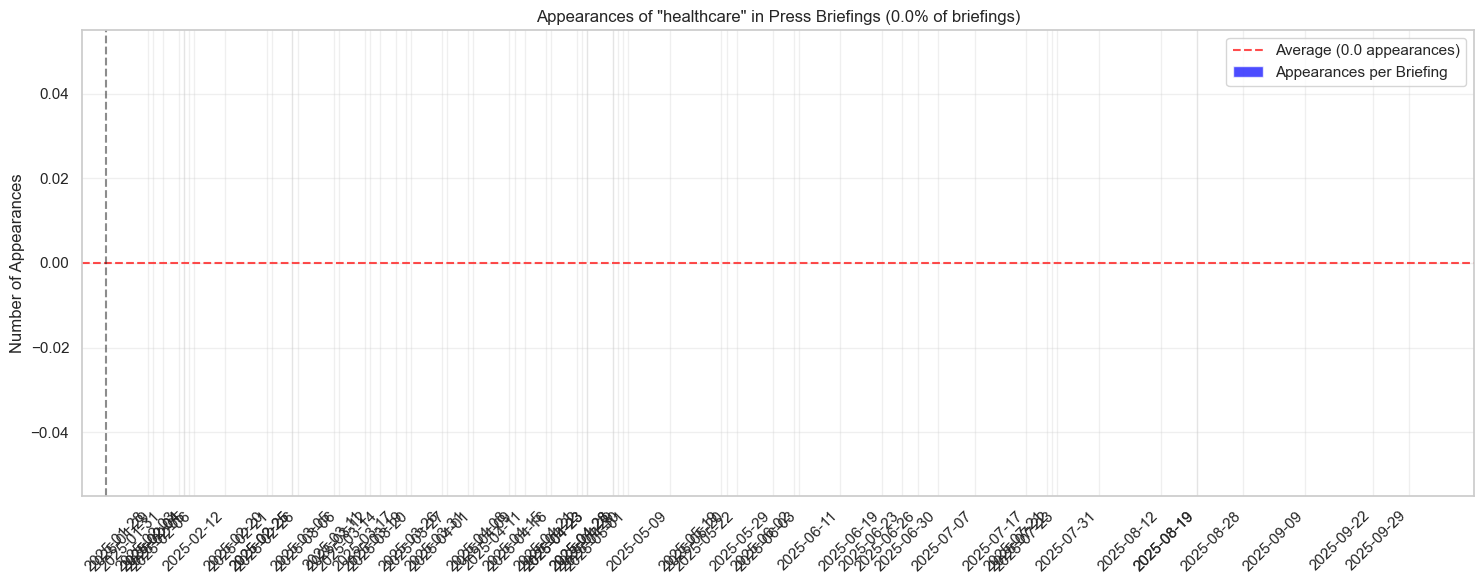

In [24]:
def plot_phrase_frequency_over_time(df, phrase):
    """Plot the frequency of a phrase over time"""
    
    # Get raw counts and dates
    counts = df[phrase]
    dates = df['date']
    
    # Calculate statistics
    avg = counts.mean()
    briefings_with_phrase = (counts > 0).sum()
    total_briefings = len(counts)
    percentage = (briefings_with_phrase / total_briefings) * 100
    
    # Create collapsible plot
    from IPython.display import HTML, display
    import uuid
    
    # Generate unique ID for this plot
    plot_id = str(uuid.uuid4())
    
    # Create the plot
    plt.figure(figsize=(15, 6))
    
    # Create bar plot
    bars = plt.bar(dates, counts, alpha=0.7, color='blue', label='Appearances per Briefing')
    
    # Add horizontal line for average
    plt.axhline(y=avg, color='red', linestyle='--', alpha=0.7, 
                label=f'Average ({avg:.1f} appearances)')
    
    # Format x-axis with rotated date labels
    plt.xticks(dates, [d.strftime('%Y-%m-%d') for d in dates], rotation=45, ha='right')
    
    plt.title(f'Appearances of "{phrase}" in Press Briefings ({percentage:.1f}% of briefings)')
    plt.xlabel('')  # Remove x-axis label since dates are shown
    plt.ylabel('Number of Appearances')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add vertical line for inauguration
    plt.axvline(x=INAUGURATION_DATE, color='k', linestyle='--', alpha=0.5, label='Inauguration')
    
    plt.tight_layout()
    
    # Save plot to buffer
    import io
    import base64
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    buf.seek(0)
    plot_data = base64.b64encode(buf.read()).decode()
    plt.close()
    
    # Display collapsible HTML
    html = f"""
    <details>
        <summary style="cursor: pointer; font-weight: bold; font-size: 16px; margin: 10px 0;">
            📊 {phrase} - {percentage:.1f}% of briefings ({briefings_with_phrase}/{total_briefings})
        </summary>
        <div style="margin: 10px 0;">
            <img src="data:image/png;base64,{plot_data}" style="max-width: 100%; height: auto;">
        </div>
    </details>
    """
    
    display(HTML(html))

# Plot time series for all phrases
for phrase in PHRASES:
    plot_phrase_frequency_over_time(df, phrase)

## Recent Usage in Context

In [27]:
get_recent_contexts_all(df, SEARCH_PHRASES)


=== Recent usage of 'Ukraine' ===

Date: 2025-09-22 (press briefing)
Context: ...e world order, and he will articulate his straightforward and constructive vision for the world. The president will also be hosting bilateral meetings with the UN secretary general and the leaders of Ukraine, Argentina and the European Union.

The president will also later in the day hold a multilateral meeting with Qatar, the Kingdom of Saudi Arabia, Indonesia, Turkey, Pakistan, Egypt, the UAE and Jordan...

Date: 2025-08-28 (press briefing)
Context: ...im about this. He was not happy about this news, but he was also not surprised. These are two countries that have been at war for a very long time. Russia launched this attack on Kyiv.

And likewise, Ukraine recently dealt a blow to Russia's oil refineries. They have taken out, as a matter of fact, 20 percent of Russia's oil refinery capacity over the course of their attacks throughout the month of Augus...

Date: 2025-08-19 (press briefing)
Context: ... 

## Phrase Usage Statistics

In [ ]:
# Calculate statistics for each phrase
stats_data = []

for phrase in SEARCH_PHRASES.keys():
    stats = {
        'Phrase': phrase,
        'Total Mentions': df[phrase].sum(),
        'Briefings with Mentions': (df[phrase] > 0).sum(),
        'Percentage of Briefings': (df[phrase] > 0).mean() * 100,
        'Average per Briefing': df[phrase].mean(),
        'Max in Single Briefing': df[phrase].max()
    }
    stats_data.append(stats)

stats_df = pd.DataFrame(stats_data)
stats_df = stats_df.sort_values('Total Mentions', ascending=False)

# Format the table
stats_df['Percentage of Briefings'] = stats_df['Percentage of Briefings'].round(1).astype(str) + '%'
stats_df['Average per Briefing'] = stats_df['Average per Briefing'].round(2)

display(stats_df)

,Phrase,Total Mentions,Briefings with Mentions,Percentage of Briefings,Average per Briefing,Max in Single Briefing
3,Congress,69,21,80.8%,2.65,9
0,Iran,55,13,50.0%,2.12,19
1,Israel,24,15,57.7%,0.92,5
2,Nuclear,20,6,23.1%,0.77,11
4,Intelligence,15,10,38.5%,0.58,3
9,Steve Witkoff,11,6,23.1%,0.42,2
10,Two week,11,3,11.5%,0.42,8
5,Diplomacy,9,7,26.9%,0.35,3
7,Sanction,6,5,19.2%,0.23,2
11,Geneva,4,2,7.7%,0.15,3
